<b>todo</b>
<ul>
<li>上市公司daily basic</li>
<li>上市公司balance sheet</li>
<li>上市公司balance sheet + price + 总股数 + 总市值</li>
<li>处理NULL空值</li>
<li>将数据划分为训练集和测试集</li>
<li>处理NaN值</li>
<li>处理NULL空值</li>
<li>特征缩放</li>
<li>应用算法</li>
</ul>

In [1]:
import pandas as pd
import os

# Build paths inside the project like this: os.path.join(BASE_DIR, ...)
BASE_DIR = os.path.abspath('..')
PROJ_ROOT = os.path.join(BASE_DIR, 'investtrack')

FIN_DATA_PATH = os.path.join(BASE_DIR, 'diggings/data')

def load_fin_data(ts_code, fin_path=FIN_DATA_PATH):
    csv = os.path.join(fin_path, 'findata_' + ts_code + '.csv')
    return pd.read_csv(csv)

fin_data = load_fin_data('all')
fin_data.head()

,id,created_time,last_mod_time,ts_code,announce_date,end_date,eps,dt_eps,total_revenue_ps,revenue_ps,...,rd_exp,update_flag,company_id,pb,pe,pe_ttm,close,ps,ps_ttm,total_mv
0,170267,2022-03-01 21:39:35.259782+08,2022-03-01 21:39:35.259793+08,600654.SH,1991-07-29,1990-06-30,NaN,NaN,1.2383,1.2383,...,NaN,1,3104,42.0487,623.1571,1673.1489,NaN,20.9384,19.1352,106310.6000
1,169943,2022-03-01 21:39:29.132431+08,2022-03-01 21:39:29.132443+08,600651.SH,1991-07-29,1990-06-30,NaN,NaN,1.6050,1.6050,...,NaN,1,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
2,169941,2022-03-01 21:39:29.121229+08,2022-03-01 21:39:29.121244+08,600651.SH,1991-07-29,1991-06-30,NaN,NaN,3.4953,3.4953,...,NaN,0,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
3,165590,2022-03-01 21:38:12.785825+08,2022-03-01 21:38:12.785845+08,600602.SH,1991-07-29,1990-06-30,NaN,NaN,1.3155,1.3155,...,NaN,0,3060,3.2406,NaN,NaN,NaN,NaN,NaN,94400.0000
4,170157,2022-03-01 21:39:33.46794+08,2022-03-01 21:39:33.467953+08,600653.SH,1991-07-29,1991-06-30,NaN,NaN,0.9465,0.9465,...,NaN,0,3103,3.6163,273.2456,98.3714,NaN,3.1702,3.4486,3115.0000


In [2]:
fin_data = fin_data.drop(['id','created_time','last_mod_time'],axis=1)
fin_data.head()

,ts_code,announce_date,end_date,eps,dt_eps,total_revenue_ps,revenue_ps,capital_rese_ps,surplus_rese_ps,undist_profit_ps,...,rd_exp,update_flag,company_id,pb,pe,pe_ttm,close,ps,ps_ttm,total_mv
0,600654.SH,1991-07-29,1990-06-30,NaN,NaN,1.2383,1.2383,NaN,NaN,0.2207,...,NaN,1,3104,42.0487,623.1571,1673.1489,NaN,20.9384,19.1352,106310.6000
1,600651.SH,1991-07-29,1990-06-30,NaN,NaN,1.6050,1.6050,0.0039,NaN,0.2350,...,NaN,1,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
2,600651.SH,1991-07-29,1991-06-30,NaN,NaN,3.4953,3.4953,0.0039,NaN,0.3650,...,NaN,0,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
3,600602.SH,1991-07-29,1990-06-30,NaN,NaN,1.3155,1.3155,NaN,NaN,1.3741,...,NaN,0,3060,3.2406,NaN,NaN,NaN,NaN,NaN,94400.0000
4,600653.SH,1991-07-29,1991-06-30,NaN,NaN,0.9465,0.9465,0.6651,NaN,0.0577,...,NaN,0,3103,3.6163,273.2456,98.3714,NaN,3.1702,3.4486,3115.0000


In [3]:
fin_data['end_date'].value_counts()

2021-09-30    9155
2021-06-30    8836
2021-03-31    8408
2020-09-30    6790
2020-12-31    6329
              ... 
1990-12-31       5
1999-03-31       4
2000-03-31       3
1996-09-30       2
1994-03-31       1
Name: end_date, Length: 115, dtype: int64

In [9]:
fin_data['tangible_asset'].describe()

count    2.179040e+05
mean     3.408842e+09
std      2.075472e+10
min     -1.085741e+11
25%      5.274394e+08
50%      1.072780e+09
75%      2.360044e+09
max      1.133364e+12
Name: tangible_asset, dtype: float64

In [21]:
import math

fin_data_lte120b = fin_data[fin_data['total_mv']<12000000].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']< 1.5 * math.pow(10, 11)].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']> -0.5 * math.pow(10, 11)].copy()
fin_data_lte120b['tangible_asset'].describe()


count    1.539530e+05
mean     2.549034e+09
std      5.634396e+09
min     -3.991924e+10
25%      5.581802e+08
50%      1.101185e+09
75%      2.345274e+09
max      1.156236e+11
Name: tangible_asset, dtype: float64

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt
import math

fin_data_lte120b = fin_data[fin_data['total_mv']<12000000].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']<1.5 * math.pow(10, 11)].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']>-0.35 * math.pow(10, 11)].copy()

# fin_data.hist(bins=50, figsize=(20,15))
# plt.show()

<AxesSubplot:xlabel='tangible_asset', ylabel='total_mv'>

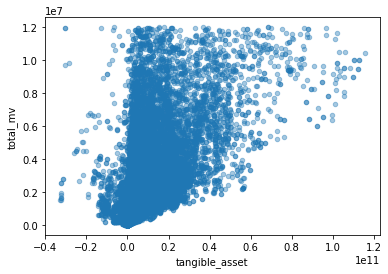

In [41]:
fin_data_lte120b.plot(kind='scatter', x='tangible_asset', y='total_mv', alpha=0.4)

In [85]:
# fin_data_lte120b.hist(['tangible_asset'], bins=1000, figsize=(20,15))
# plt.show()
fin_data_lte120b['tangible_asset'].value_counts()


1.156124e+10    3
1.141978e+10    3
1.513784e+09    2
1.818849e+09    2
7.961419e+08    2
               ..
7.034867e+08    1
1.471651e+09    1
2.080238e+09    1
2.126661e+09    1
1.196692e+09    1
Name: tangible_asset, Length: 135216, dtype: int64

<AxesSubplot:>

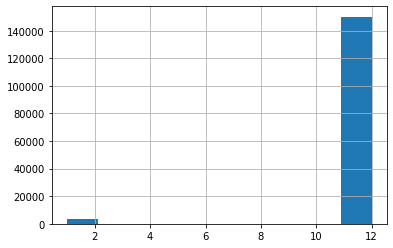

In [82]:
# import numpy as np
# from numpy.random import MT19937
# from numpy.random import RandomState, SeedSequence
# rs = RandomState(MT19937(SeedSequence(123456789)))
# # Later, you want to restart the stream
# rs = RandomState(MT19937(SeedSequence(987654321)))
# print(type(rs))

# ages = np.array([1,5,10,40,36,12,58,62,77,89,100,18,20,25,30,32]) #年龄数据
ages = np.array([1,5,10,40,36,12,58,62,77,89,100,18,20,25,30,32]) 
# pd.cut(ages, 5)

a = pd.cut(fin_data_lte120b['tangible_asset'], bins=[-np.inf, 0., 0.01, 0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.19, np.inf], labels=[1,2,3,4,5,6,7,8,9,10,11,12])
a.hist()


In [72]:
ages = np.array([1,5,10,40,36,12,58,62,77,89,100,18,20,25,30,32]) #年龄数据
a = pd.cut(ages, 5, labels=[u"婴儿",u"青年",u"中年",u"壮年",u"老年"])
a.describe()

,counts,freqs
categories,,
婴儿,6,0.3750
青年,5,0.3125
中年,1,0.0625
壮年,2,0.1250
老年,2,0.1250


2    151828
3      1390
1       462
4       208
5        59
Name: tangible_asset_cat, dtype: int64

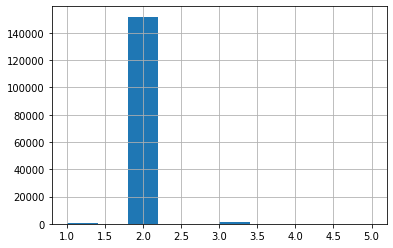

In [59]:
# fin_data_lte120b['tangible_asset_cat'] = pd.cut(fin_data_lte120b['tangible_asset'], 5)

# fin_data.head()

In [32]:
fin_data['revenue_ps_cat'].hist()
fin_data['revenue_ps_cat'].value_counts()

KeyError: 'revenue_ps_cat'

In [16]:
fin_data.head(), fin_data['revenue_ps_cat']

(     ts_code      total_mv    end_date  total_revenue_ps  surplus_rese_ps  \
 0  000002.SZ  2.116982e+07  2021-09-30           23.3528           8.3839   
 1  000002.SZ  2.116982e+07  2021-09-30           23.3528           8.3839   
 2  000002.SZ  2.258812e+07  2021-06-30           14.3841           8.3894   
 3  000002.SZ  3.263421e+07  2021-03-31            5.3594           8.3894   
 4  000002.SZ  3.263421e+07  2021-03-31            5.3594           8.3894   
 
    undist_profit_ps           daa        ebitda          ebit  interst_income  \
 0            8.6521           NaN           NaN  3.615819e+10    3.056885e+09   
 1            8.6521           NaN           NaN  3.615819e+10    3.056885e+09   
 2            8.1721  3.694243e+09  2.730719e+10  2.361295e+10    1.532080e+09   
 3            8.5825           NaN           NaN  5.333030e+09    1.224959e+09   
 4            8.5825           NaN           NaN  5.696747e+09             NaN   
 
   revenue_ps_cat  
 0              

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)
for train_index, test_index in split.split(fin_data, fin_data['revenue_ps_cat']):
    strat_train_set = fin_data.loc[train_index]
    strat_test_set = fin_data.loc[test_index]

# strat_test_set['revenue_ps_cat'].value_counts()/len(strat_test_set)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

data_x = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
data_y = np.array([0, 0, 0, 1, 1, 1])
stratified_split = StratifiedShuffleSplit(n_splits=2, test_size=0.50)
x, y = stratified_split.split(data_x, data_y)
x,y

((array([0, 5, 3]), array([1, 4, 2])), (array([2, 5, 0]), array([4, 1, 3])))

In [34]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [24]:
fin_data_lte120b = fin_data[fin_data['total_mv']<12000000].copy()
# fin_data_gte120b = fin_data[fin_data['total_mv']>12000000].copy()

corr_matrix = fin_data_lte120b.corr()
# corr_matrix['total_mv'].sort_values(ascending=False)
print(corr_matrix['total_mv'].sort_values(ascending=False).head(20))

total_mv              1.000000
tangible_asset        0.650096
retained_earnings     0.619488
gross_margin          0.556293
profit_prefin_exp     0.545624
invest_capital        0.540448
profit_dedt           0.522194
op_income             0.465235
fixed_assets          0.437353
ebitda                0.434560
q_dtprofit            0.420473
interestdebt          0.419861
rd_exp                0.389927
ebit                  0.385061
daa                   0.375438
q_opincome            0.373934
current_exint         0.350956
noncurrent_exint      0.322995
netdebt               0.321027
valuechange_income    0.310877
Name: total_mv, dtype: float64


array([[<AxesSubplot:xlabel='total_mv', ylabel='total_mv'>,
        <AxesSubplot:xlabel='tangible_asset', ylabel='total_mv'>,
        <AxesSubplot:xlabel='retained_earnings', ylabel='total_mv'>,
        <AxesSubplot:xlabel='gross_margin', ylabel='total_mv'>,
        <AxesSubplot:xlabel='profit_prefin_exp', ylabel='total_mv'>,
        <AxesSubplot:xlabel='invest_capital', ylabel='total_mv'>,
        <AxesSubplot:xlabel='profit_dedt', ylabel='total_mv'>,
        <AxesSubplot:xlabel='op_income', ylabel='total_mv'>,
        <AxesSubplot:xlabel='ebit', ylabel='total_mv'>],
       [<AxesSubplot:xlabel='total_mv', ylabel='tangible_asset'>,
        <AxesSubplot:xlabel='tangible_asset', ylabel='tangible_asset'>,
        <AxesSubplot:xlabel='retained_earnings', ylabel='tangible_asset'>,
        <AxesSubplot:xlabel='gross_margin', ylabel='tangible_asset'>,
        <AxesSubplot:xlabel='profit_prefin_exp', ylabel='tangible_asset'>,
        <AxesSubplot:xlabel='invest_capital', ylabel='tangible_asse

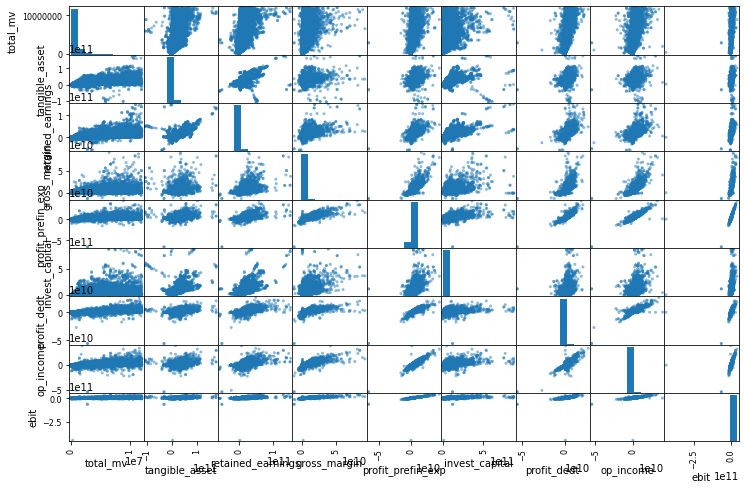

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(fin_data_lte120b[['total_mv','tangible_asset','retained_earnings','gross_margin','profit_prefin_exp','invest_capital','profit_dedt','op_income','ebit']], figsize=(12,8))